In [1]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import backtesting as bt

In [2]:
# Define parameters

initial_investment = 115.24
start_date = datetime.date(2021, 1, 1)
end_date = None
rebalancing_frequency = "monthly"
n_projects = 13
max_weight = 0.20
min_weight = 1e-3
max_change = 0.05
min_circ_marketcap = 1e8
projects_to_include = [
    "0x",
    "1inch",
    "88mph",
    "Aave",
    "Abracadabra.money",
    "Alchemix Finance",
    "Alpha Finance",
    "Axie Infinity",
    "Balancer",
    "Bancor",
    "Barnbridge",
    "Basket DAO",
    "Centrifuge",
    "Clipper",
    "Compound",
    "Cryptex",
    "Curve",
    "dForce",
    "dHedge",
    "DODO",
    "dYdX",
    "Enzyme Finance",
    "Erasure Protocol",
    "Ethereum Name Service",
    "Fei Protocol",
    "Harvest Finance",
    "Idle Finance",
    "Index Cooperative",
    "Instadapp",
    "Integral Protocol",
    "Keep Network",
    "Kyber",
    "Lido Finance",
    "Liquity",
    "Livepeer",
    "Loopring",
    "MakerDAO",
    "mStable",
    "Nexus Mutual",
    "Notional Finance",
    "Perpetual Protocol",
    "PieDAO",
    "PoolTogether",
    "PowerPool",
    "Rarible",
    "Rari Capital",
    "Reflexer",
    "Ren",
    "Ribbon Finance",
    "Stake DAO",
    "SushiSwap",
    "Synthetix",
    "The Graph",
    "Thorchain",
    "Tokenlon",
    "UMA",
    "Uniswap",
    "Unit Protocol",
    "Vesper Finance",
    "yearn.finance",
    "Yield Guild Games",
]

In [3]:
# Load historical data and use categorical variables to increase performance

historical_data = pd.read_csv("historical_data.csv")
for c in ["datetime", "project"]:
    historical_data[c] = historical_data[c].astype('category')

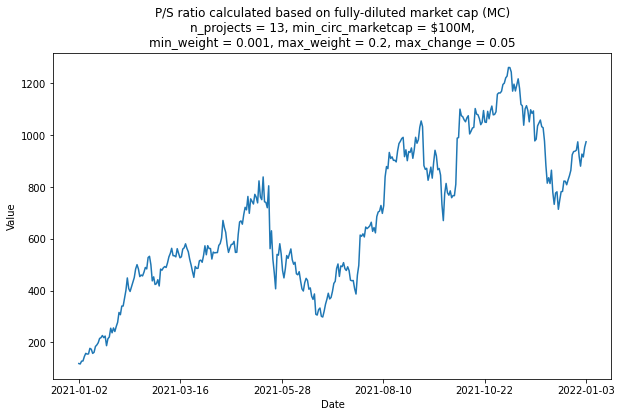

In [4]:
# Run backtesting

fig, ax = plt.subplots(1, figsize=(10, 6))

results = bt.backtest(
    n_projects=n_projects,
    initial_investment=initial_investment,
    min_circ_marketcap=min_circ_marketcap,
    min_weight=min_weight,
    max_weight=max_weight,
    max_change=max_change,
    start_date=start_date,
    historical_data=historical_data,
    projects_to_include=projects_to_include,
    rebalancing_frequency=rebalancing_frequency,
    end_date=end_date,
    quiet=False,
)

# Plot portfolio value over the backtesting period
dates = [
    pf["datetime"][0]
    for i, pf in enumerate(results["portfolios"])
    if results["statuses"][i] == "normal-day"
    or results["statuses"][i] == "rebalanced"
]
values = [
    bt._calculate_value(pf)
    for i, pf in enumerate(results["portfolios"])
    if results["statuses"][i] == "normal-day"
    or results["statuses"][i] == "rebalanced"
]

ax.plot(dates, values)

ax.set_xticks(np.linspace(0, len(dates) - 1, 6))
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.set_title(
    (
        f"P/S ratio calculated based on fully-diluted market cap (MC)\n"
        f"n_projects = {n_projects}, "
        f"min_circ_marketcap = ${int(min_circ_marketcap/1e6)}M,\n"
        f"min_weight = {min_weight}, "
        f"max_weight = {max_weight}, "
        f"max_change = {max_change}"
    )
)
plt.show()